In [1]:
import os
import numpy as np
import SimpleITK as sitk
import matplotlib.pyplot as plt

In [7]:
from cardiac.cadc_perfusion import gen_defect_extent_bull_eye_map, gen_defect_severity_bull_eye_map,gen_score_bull_eye
from cardiac.cadc_perfusion import cal_defect_extent, cal_defect_severity,cal_tdp, cal_categoric_scores

base_dir = r'./'
os.path.exists(base_dir)

True

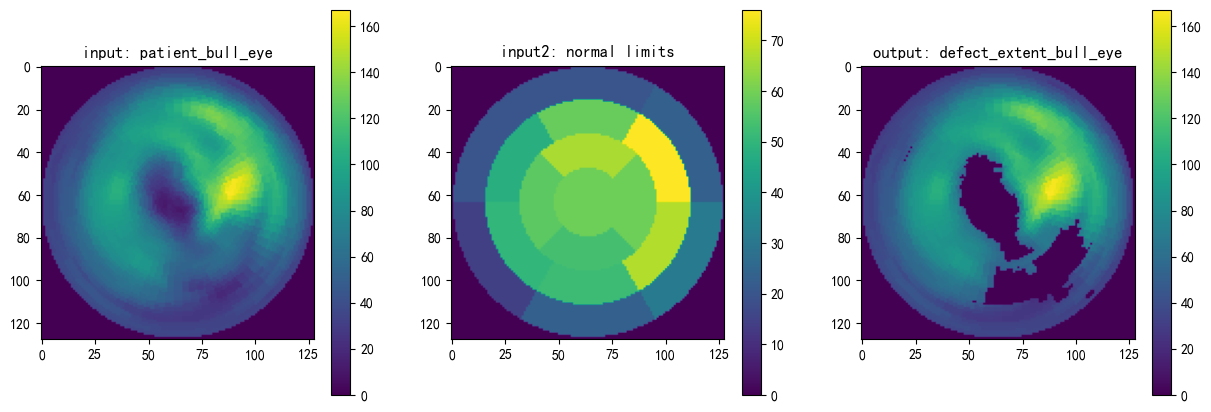

In [8]:
commercial_software_gen_cad_bull_eye = sitk.GetArrayFromImage(sitk.ReadImage(os.path.join(base_dir, 'perfusion_demo_img', 'BullEye_cad'))).astype(np.float32)[1]
normal_limits_bull_eye = np.load(os.path.join(base_dir, 'normal_limits', 'male_rest_normal_limits.npy')).astype(np.float32)

defect_extent_polor_map = gen_defect_extent_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: patient_bull_eye')
plt.colorbar()

plt.subplot(132)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(133)
plt.imshow(defect_extent_polor_map)
plt.title('output: defect_extent_bull_eye')
plt.colorbar()

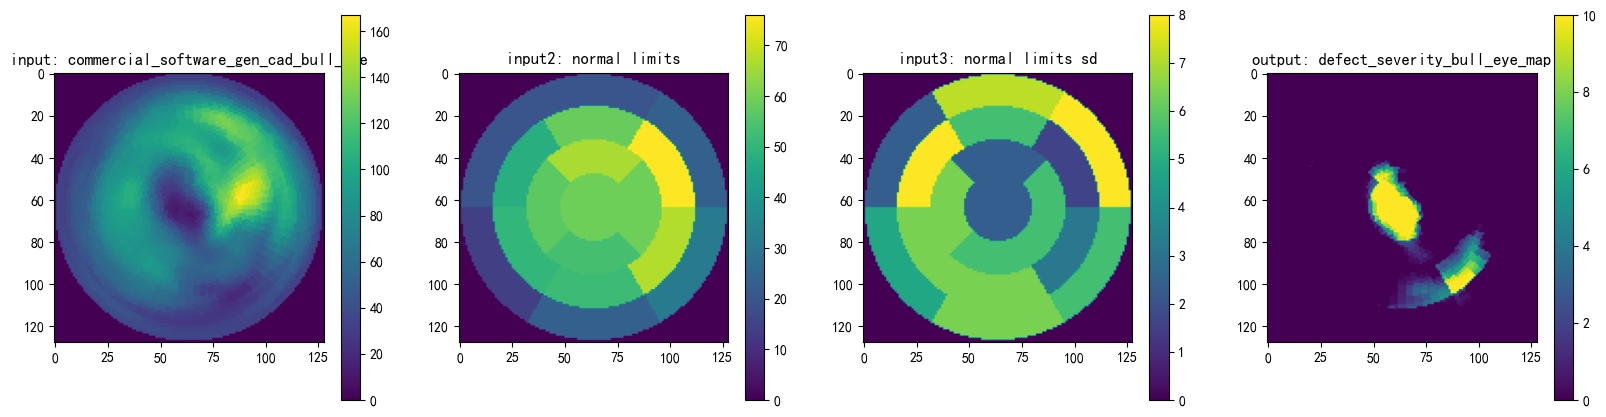

In [9]:
normal_limits_bull_eye_sd = np.load(os.path.join(base_dir, 'normal_limits', 'male_rest_sd.npy')).astype(np.float32)
defect_severity_polor_map = gen_defect_severity_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye, normal_limits_bull_eye_sd)

plt.figure(figsize=(20,5))
plt.subplot(141)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: commercial_software_gen_cad_bull_eye')
plt.colorbar()

plt.subplot(142)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(143)
plt.imshow(normal_limits_bull_eye_sd)
plt.title('input3: normal limits sd')
plt.colorbar()

plt.subplot(144)
plt.imshow(defect_severity_polor_map)
plt.title('output: defect_severity_bull_eye_map')
plt.colorbar()


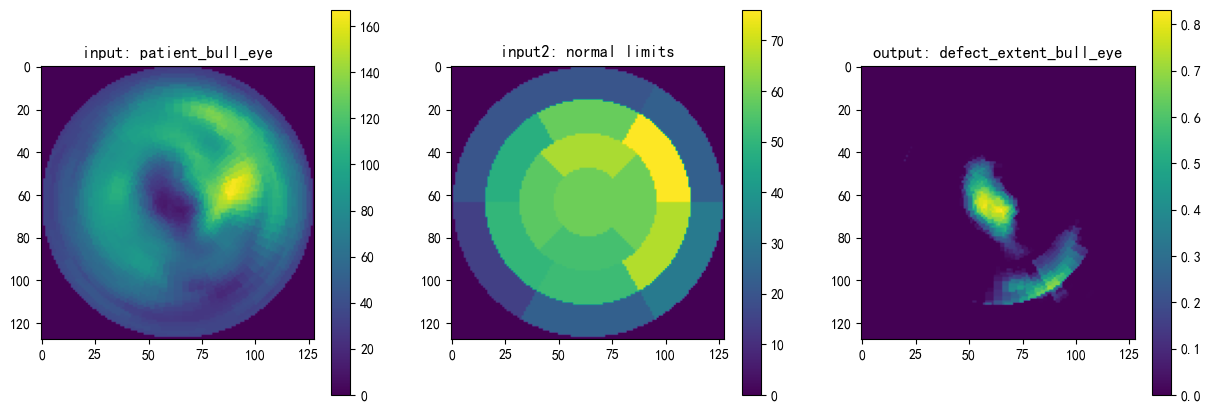

In [10]:
score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)


plt.figure(figsize=(15,5))

plt.subplot(131)
plt.imshow(commercial_software_gen_cad_bull_eye)
plt.title('input: patient_bull_eye')
plt.colorbar()

plt.subplot(132)
plt.imshow(normal_limits_bull_eye)
plt.title('input2: normal limits')
plt.colorbar()

plt.subplot(133)
plt.imshow(score_bull_eye)
plt.title('output: defect_extent_bull_eye')
plt.colorbar()



In [11]:
segment17 = np.load(os.path.join(base_dir, 'segment_img', 'segment17.npy')).astype(np.float32)
segment_coronary_artery = np.load(os.path.join(base_dir, 'segment_img', 'segment_coronary_artery.npy')).astype(np.float32)
segment_myocardial_wall = np.load(os.path.join(base_dir, 'segment_img', 'segment_myocardial_wall.npy')).astype(np.float32)

{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 1.9406392694063925, 5.0: 7.753705815279361, 6.0: 0.0, 7.0: 0.0, 8.0: 0.5988023952095809, 9.0: 0.0, 10.0: 54.80480480480481, 11.0: 63.772455089820355, 12.0: 0.0, 13.0: 16.39072847682119, 14.0: 7.6158940397351, 15.0: 23.509933774834437, 16.0: 0.0, 17.0: 73.39901477832512, 'total': 14.113032340698048}
{1.0: 13.641188959660298, 2.0: 15.251373046049851, 3.0: 17.004747518342683, 'total': 15.824423185143498}
{1.0: 25.69735006973501, 2.0: 0.6624825662482566, 3.0: 2.510460251046025, 4.0: 8.960948396094839, 5.0: 66.47058823529412, 'total': 14.113032340698048}


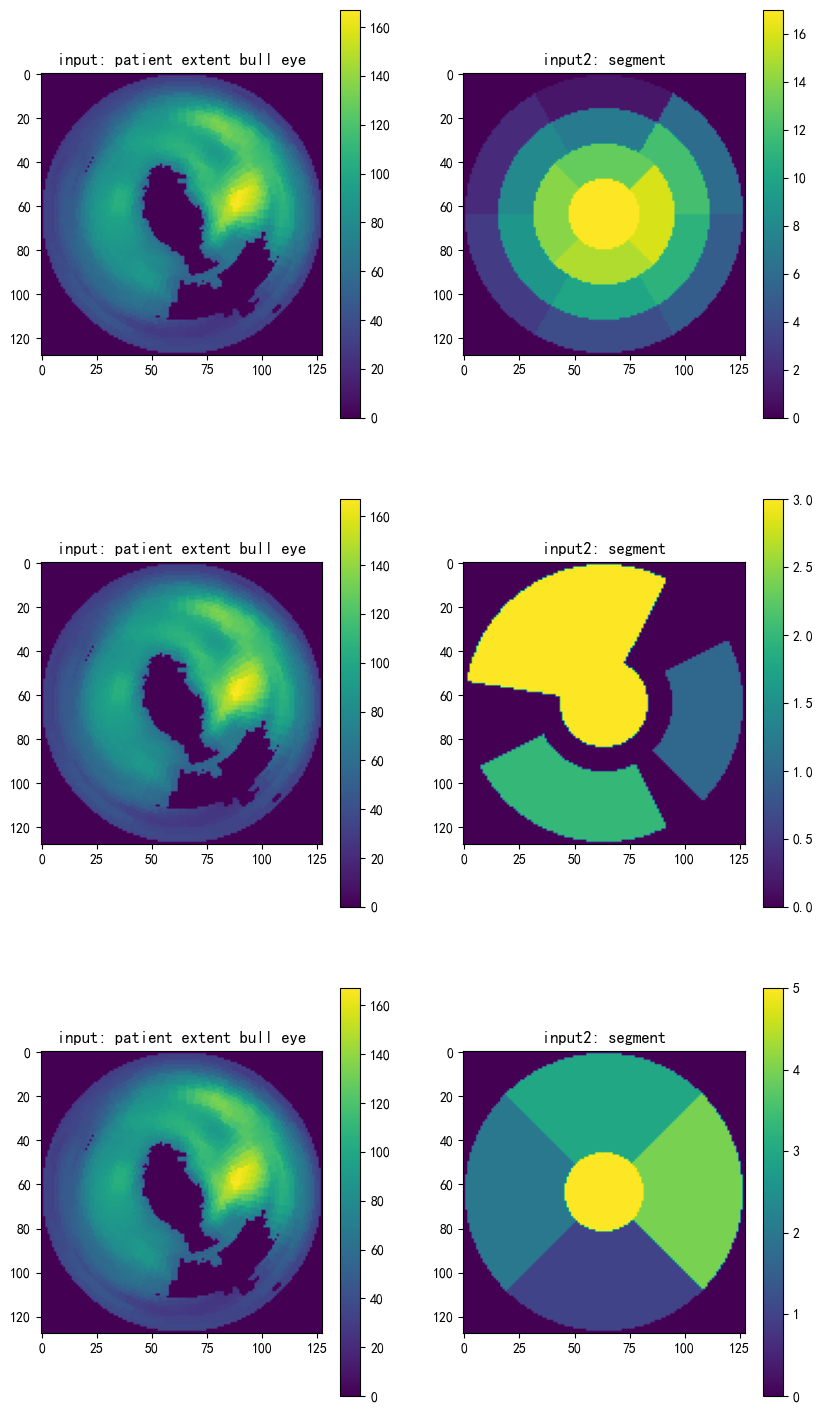

In [12]:
defect_extent_polor_map = gen_defect_extent_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
defect_extent_dict17 = cal_defect_extent(defect_extent_polor_map, segment17, False)
print(defect_extent_dict17)
defect_extent_dict_cor = cal_defect_extent(defect_extent_polor_map, segment_coronary_artery, False)
print(defect_extent_dict_cor)
defect_extent_dict_myo = cal_defect_extent(defect_extent_polor_map, segment_myocardial_wall, False)
print(defect_extent_dict_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(defect_extent_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 0.0059575047343969345, 5.0: 0.03718039393424988, 6.0: 0.0, 7.0: 0.0, 8.0: 0.001497006043791771, 9.0: 0.0, 10.0: 1.1383248567581177, 11.0: 3.3770627975463867, 12.0: 0.0, 13.0: 0.7849054932594299, 14.0: 0.10523584485054016, 15.0: 0.2141086459159851, 16.0: 0.0, 17.0: 5.9879913330078125, 'total': 68.70031976715097}
{1.0: 0.5563400983810425, 2.0: 0.29388630390167236, 3.0: 1.1795505285263062, 'total': 81.1458754660242}
{1.0: 0.729317843914032, 2.0: 0.006178081035614014, 3.0: 0.10410116612911224, 4.0: 0.36546188592910767, 5.0: 5.025426387786865, 'total': 68.70031976715097}


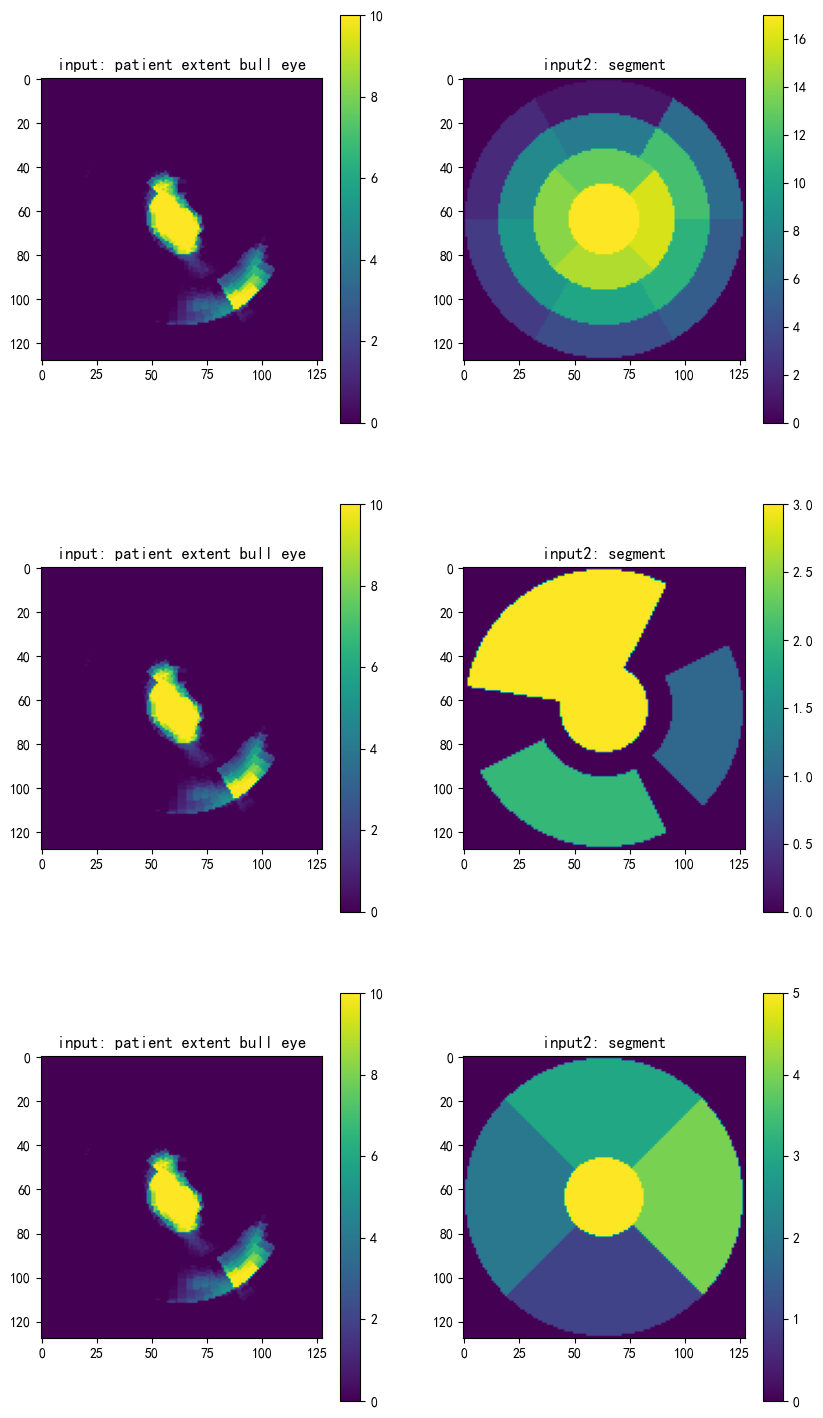

In [13]:
defect_severity_polor_map = gen_defect_severity_bull_eye_map(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye, normal_limits_bull_eye_sd)
defect_severity_dict17 = cal_defect_severity(defect_severity_polor_map, segment17, False)
print(defect_severity_dict17)
defect_extent_dict_cor = cal_defect_severity(defect_severity_polor_map, segment_coronary_artery, False)
print(defect_extent_dict_cor)
defect_extent_dict_myo = cal_defect_severity(defect_severity_polor_map, segment_myocardial_wall, False)
print(defect_extent_dict_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(defect_severity_polor_map)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


{1.0: 0.0, 2.0: 0.0, 3.0: 0.0, 4.0: 1.9406392694063925, 5.0: 7.753705815279361, 6.0: 0.0, 7.0: 0.0, 8.0: 0.5988023952095809, 9.0: 0.0, 10.0: 54.80480480480481, 11.0: 63.772455089820355, 12.0: 0.0, 13.0: 16.39072847682119, 14.0: 7.6158940397351, 15.0: 23.509933774834437, 16.0: 0.0, 17.0: 73.39901477832512, 'total': 14.113032340698048}
{1.0: 13.908502459526062, 2.0: 7.347157597541809, 3.0: 29.488763213157654, 'total': 20.286469161510468}
{1.0: 18.2329460978508, 2.0: 0.15445202589035034, 3.0: 2.602529153227806, 4.0: 9.136547148227692, 5.0: 125.63565969467163, 'total': 17.175079882144928}


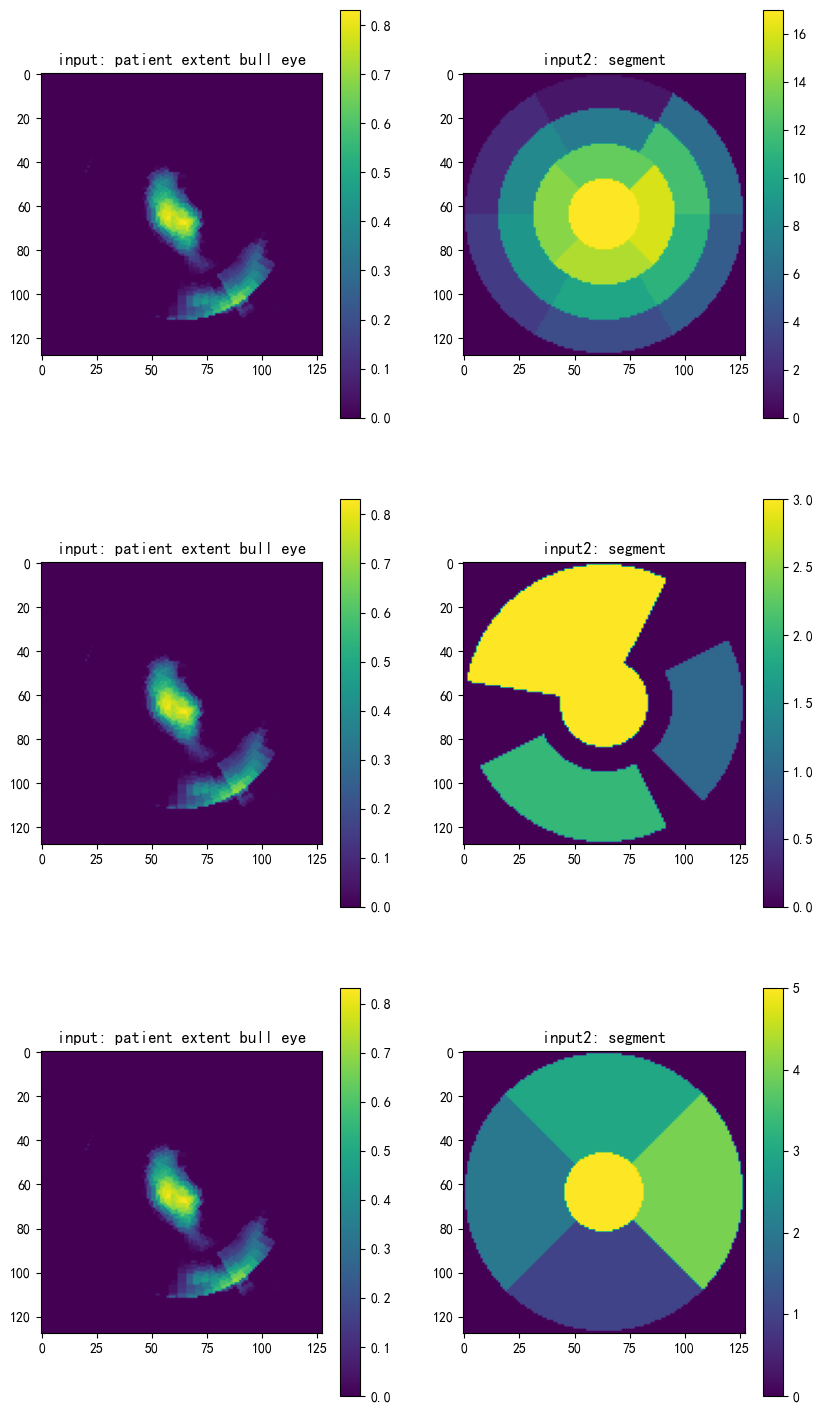

In [14]:
score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
tpd_dict17 = cal_tdp(score_bull_eye, segment17, False)
print(defect_extent_dict17)
tpd_dict_cor = cal_tdp(defect_severity_polor_map, segment_coronary_artery, False)
print(tpd_dict_cor)
tpd_dict17_myo = cal_tdp(defect_severity_polor_map, segment_myocardial_wall, False)
print(tpd_dict17_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


[0.0, 0.0, 0.0, 0.0016434484, 0.0066734017, 0.0, 0.0, 0.000249501, 0.0, 0.14010157, 0.17095728, 0.0, 0.029387401, 0.011857564, 0.022369549, 0.0, 0.33561608]
[0.5563401, 0.2938863, 1.1795505]
[0.72931784, 0.006178081, 0.104101166, 0.3654619, 5.0254264]


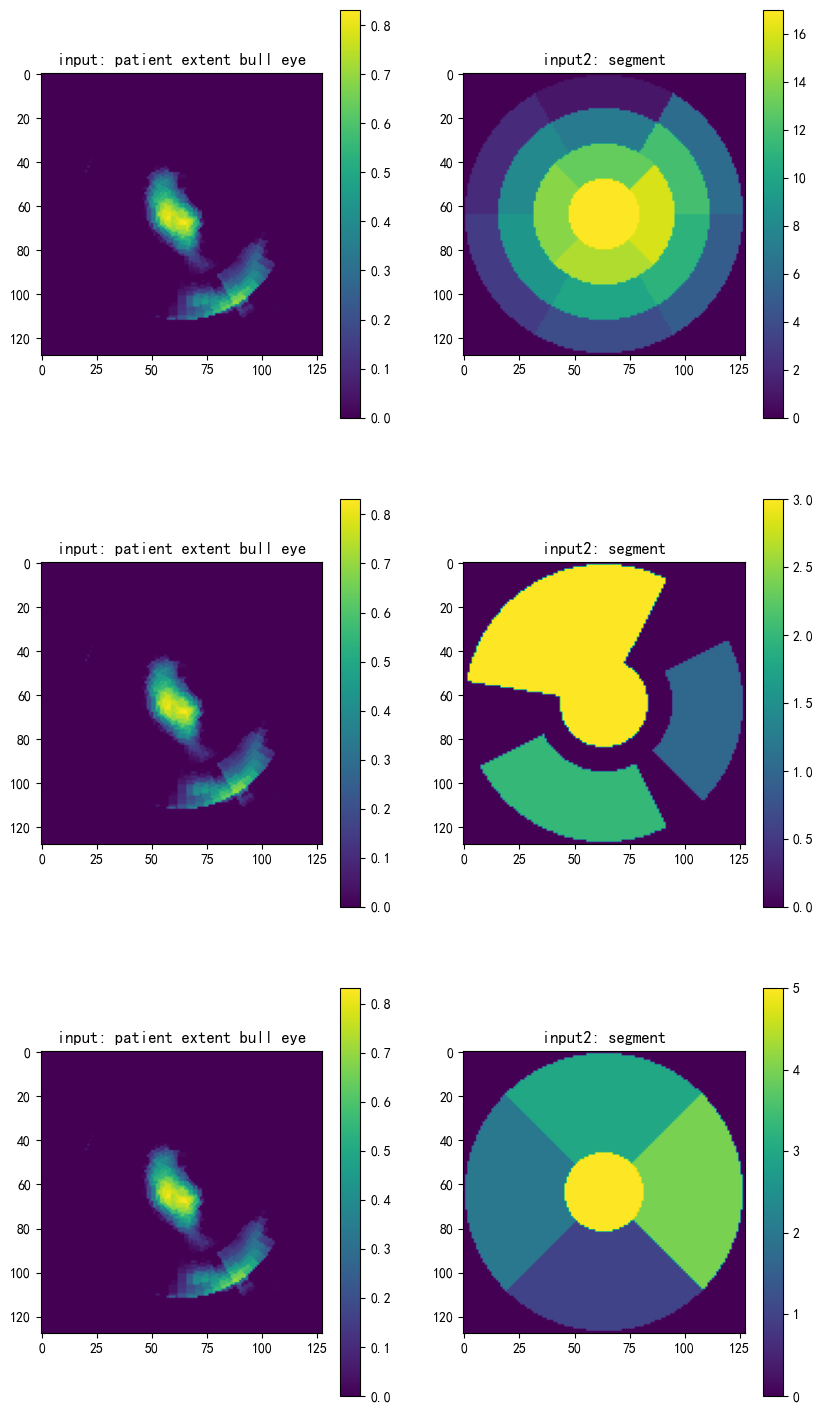

In [15]:
def cal_categoric_scores(score_bull_eye, segment, max_boarder=True):
    _segment = segment+0
    if max_boarder:
        filt = _segment == np.max(_segment)
        _segment[filt] = 0
    
    categoric_scores = []
    foreground = np.unique(_segment)
    foreground = foreground[foreground>0]
    for seg_id in foreground:
        score = np.mean(score_bull_eye[_segment == seg_id])
        # print(score)
        # score = 0 if score < 1 else np.round(np.clip(max(2,score),2,5))
        categoric_scores.append(score)
    return categoric_scores


score_bull_eye = gen_score_bull_eye(commercial_software_gen_cad_bull_eye, normal_limits_bull_eye)
categoric_scores_seg17 = cal_categoric_scores(score_bull_eye, segment17, False)
print(categoric_scores_seg17)
categoric_scores_cor = cal_categoric_scores(defect_severity_polor_map, segment_coronary_artery, False)
print(categoric_scores_cor)
categoric_scores_myo = cal_categoric_scores(defect_severity_polor_map, segment_myocardial_wall, False)
print(categoric_scores_myo)

plt.figure(figsize=(10,18))
plt.subplot(321)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(322)
plt.imshow(segment17)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(323)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(324)
plt.imshow(segment_coronary_artery)
plt.title('input2: segment')
plt.colorbar()

plt.subplot(325)
plt.imshow(score_bull_eye)
plt.title('input: patient extent bull eye')
plt.colorbar()

plt.subplot(326)
plt.imshow(segment_myocardial_wall)
plt.title('input2: segment')
plt.colorbar()


In [16]:
categoric_scores_myo = cal_categoric_scores(defect_severity_polor_map, segment_myocardial_wall, False)
print(categoric_scores_myo)

[0.72931784, 0.006178081, 0.104101166, 0.3654619, 5.0254264]


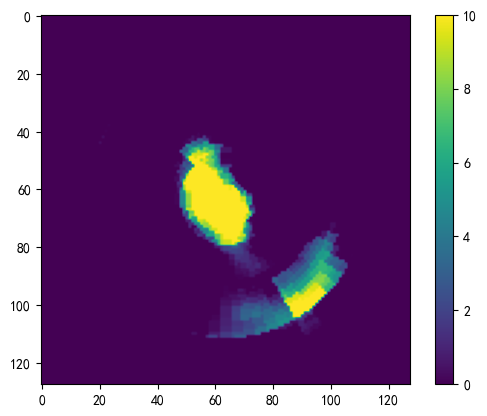

In [17]:
plt.imshow(defect_severity_polor_map)
plt.colorbar()